In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Analyzing Top Smartphone Platforms, Manufacturers, and Brands 

In this assignment, you will play the role of lead data analyst for a regional conglomerate of mobile phone vendors. The organization maintains storefronts in New England, and plans to update its inventory and promotional offerings in the upcoming sales season. 

They have tasked you to analyze a number of CSVs containing data on top smartphone brands and phone usage. Specifically, you will need to answer the following questions about the cell phone market:
- What is the breakdown in terms of platform popularity; i.e. Android and iOS?  
- What is the breakdown in terms of popular phone manufacturers? 
- What is the most popular smartphone brand? 
- What smartphone brand has the highest average call minutes by user? 
- What smartphone brand has the highest average SMS usage by user? 
- What smartphone brand has the highest average data usage by user? 

This information will help the company plan their purchases for the upcoming year and better position and market certain brands for specific types of users. 

In order to answer the first two questions, you will first need to merge the `device_info.csv` and `user_device.csv` files. You will complete this in Part 1 of the assignment before proceeding to the analysis in Part 2. In Part 3, you will load and analyze a brand new `usage_all.csv` to answer the remaining questions. 


---

### Getting Started
To get started, download the following files:
- `Unit 21 - Technical - Unsolved.ipynb` (_this notebook_)
- `device_info.csv`
- `user_device.csv`
- `usage_all.csv`

Place these together in to a dedicated directory on your hard drive. We recommend creating a folder in your `Documents` directory for this week of class, as follows:

```
Documents/
  Python/
    Week21/
      Unit 21 - Technical - Unsolved.ipynb
      device_info.csv
      user_device.csv
      usage_all.csv
```

Then, start Jupyter Notebook and open `Unit 21 - Technical - Unsolved.ipynb` in your browser. Make sure the `device_info.csv`, `user_device.csv` and `usage_all.csv` files live in the same directory.

### Problem Structure
Each problem will be accompanied by:
- **Instructions**
  - Each problem features a markdown cell explaining the problem.
- **Unfinished Code Cells**
  - Each problem has unfinished code cells, where you will write code to solve the problem.
  - Cells will contain either starter code for you to finish, or a comment explaining what your code should do.
- **Expected Output**. 
  - Many unfinished code cells will have output below them. You will be expected to write code that produces the same output.
  - Some unfinished code cells do _not_ have output below them. This is simply because not all code will generate output. Your solutions for these cells should _not_ print anything.
  
### Deliverables
To receive credit for this assignment, you must submit the following files:
- Your completed Jupyter Notebook

Your completed Jupyter Notebook will be this file, but with all of the problems solved. This is the only file you will need to submit. When you're done with the assignment, run all cells to verify that your code executes as expected. Then, save and submit this notebook.

Good luck!

## Part 1: Loading & Merging Datasets
Before generating any plots, you will load and explore the raw data, then prepare your merged DataFrames.

### Part 1: Load CSVs
Get started by loading `user_device.csv` and `device_info.csv` into the variables `user_device` and `device_info`, respectively.

In [2]:
# Provided Code -- Do NOT Edit!
user_device_csv = 'user_device.csv'

In [3]:
# Provided Code -- Do NOT Edit!
device_info_csv = 'device_info.csv'

#### `user_device`

Load `user_device.csv`; print the `head` of the DataFrame and its `dtypes`.

In [4]:
# TODO: Load `user_device.csv`
user_device = pd.read_csv('user_device.csv')

Next

In [5]:
# TODO: Print `head` of `user_device` 
user_device.head(2)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3


In [6]:
# TODO: Print `dtypes` of `user_device`
user_device.dtypes

use_id                int64
user_id               int64
platform             object
platform_version    float64
device               object
use_type_id           int64
dtype: object

#### `device_info`


Load `device_info.csv`; print the `head` of the DataFrame and its `dtypes`.

In [7]:
# TODO: Load `device_info.csv`
device_info = pd.read_csv('device_info.csv')

In [8]:
# TODO: Print `head` of `device_info`
device_info.head(2)

,Manufacturer,Marketing Name,Make,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21


In [9]:
# TODO: Print `dtypes` of `device_info`
device_info.dtypes

Manufacturer      object
Marketing Name    object
Make              object
Model             object
dtype: object

### Problem 2: Merge DataFrames to Create `phones`
Perform a left join to merge `user_device` and `device_info`, by joining the `device` column of `user_device` on the `Model` column of `device_info`.

Print the `head` of the DataFrame when finished.

In [10]:
# TODO: Left join `user_devie` and `deviec_info`, with `device` as left column and `Model` as right
phones = user_device.merge(right = device_info, how='left', left_on='device', right_on='Model')

In [11]:
# TODO: Print `head` of DataFrame
phones.head()

,use_id,user_id,platform,platform_version,device,use_type_id,Manufacturer,Marketing Name,Make,Model
0,22782,26980,ios,10.2,"iPhone7,2",2,Apple,iPhone 6,iPhone 6,"iPhone7,2"
1,22783,29628,android,6.0,Nexus 5,3,LGE,Nexus 5,hammerhead,Nexus 5
2,22784,28473,android,5.1,SM-G903F,1,Samsung,Galaxy S5 Neo,s5neolte,SM-G903F
3,22785,15200,ios,10.2,"iPhone7,2",3,Apple,iPhone 6,iPhone 6,"iPhone7,2"
4,22786,28239,android,6.0,ONE E1003,1,OnePlus,OnePlus,OnePlus,ONE E1003


## Part 2: Exploring Platform, OS & Device Popularity
Now that you've loaded all the data you'll need, you'll use `phones` to answer the first two business questions: 

- What is the breakdown in terms of platform popularity; i.e. Android and iOS?
- What is the breakdown in terms of popular phone manufacturers?


### Problem 1: Plotting Platform Popularity
This problem answers the question: _Which is more popular: Android or iOS?_

Follow the steps below:
- Use the `user_device` DataFrame to create groups based on device `platform`
  - Save the result to a variable called `platform_groups`
- Compute the `size` of each group
  - Save the result in a variable called `platform_group_sizes`
- Plot the `size` of each group as a `pie` chart, with the labels `Android` and `iOS`
- Make sure the plot has no `ylabel`
- `show` the plot

You should see a pie chart with two regions: One for Android, and one for iOS. The Android region should be blue, and significantly larger than the iOS region. 

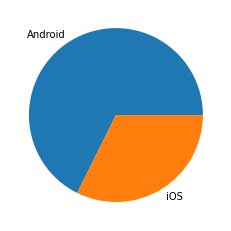

In [12]:
# TODO: Create `platform_groups` based on `platform`
platform_groups = user_device.groupby(user_device['platform'].str.title().replace('Ios', 'iOS'))

# TODO: Compute `size` of `platform_groups`
platform_group_sizes = platform_groups.size()

# TODO: Generate `pie` chart from sizes
platform_group_sizes.plot(kind='pie')

# TODO: Eliminate `ylabel`
plt.ylabel('')

# TODO: Show plot
plt.show()

### Problem 2: Plotting Manufacturer Market Share
Next, you will create a pie chart showing how many users each manufacturer has. This will answer the question: _Which brands have the most market share?_

Follow the steps below:
- Use `phones` to create groups based on `Manufacturer`
  - Save the result into a variable called `device_manufacturer_groups`
- Compute the `size` of these groups
  - Save the result into a variable called `device_manufacturer_group_sizes`
- Plot the group `size`s as a `pie` chart
- Make sure the plot has no `ylabel`
- `show` the plot

You should see a pie chart with 10 regions: One for each manufacturer. It may look cluttered -- that's okay. You'll fix the clutter in the next problem.

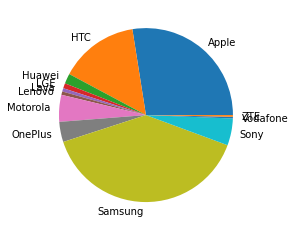

In [13]:
# TODO: Create `device_manufacturer_groups` based on `Manufacturer`
device_manufacturer_groups = phones.groupby('Manufacturer')

# TODO: Compute `size` of `device_manufacturer_groups`
device_manufacturer_group_sizes = device_manufacturer_groups.size()

# TODO: Generate `pie` chart from sizes
device_manufacturer_group_sizes.plot(kind = 'pie')

# TODO: Eliminate `ylabel`
plt.ylabel('')

# TODO: Show plot
plt.show()

### Problem 3: Creating a Histogram of Manufacturer Market Share
The pie chart you just created a little cluttered. In this problem, you'll use the same data to create a bar chart, which communicates the same information with less clutter.

Follow the steps below:
- Use `phones` to create groups based on `Manufacturer`
  - Save the result into a variable called `device_manufacturer_groups`
- Compute the `size` of these groups
  - Save the result into a variable called `device_manufacturer_group_sizes`
- Plot the group `size`s as a `bar` chart
- Make sure the plot has no `ylabel`
- `show` the plot

Note that the only difference from the previous problem is that you will create a `bar` chart instead of a `pie` chart.

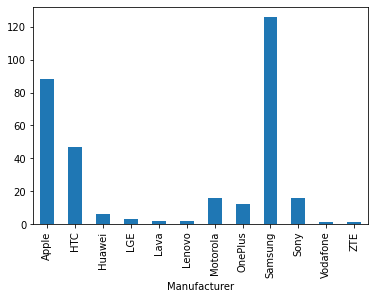

In [14]:
# TODO: Create `device_manufacturer_groups` based on `Manufacturer`
device_manufacturer_groups = phones.groupby('Manufacturer')

# TODO: Compute `size` of `device_manufacturer_groups`
device_manufacturer_group_sizes = device_manufacturer_groups.size()

# TODO: Generate `bar_chart` chart from sizes
device_manufacturer_group_sizes.plot(kind = 'bar')

# TODO: Eliminate `ylabel`
plt.ylabel('')

# TODO: Show plot
plt.show()

These plots give a clear picture of each platform and manufacturer's market share.

## Part 3: Deep Dive into Usage Trends
In Part 3, you'll answer the remaining business questions. 
- What is the most popular smartphone brand? 
- What smartphone brand has the highest average call minutes by user? 
- What smartphone brand has the highest average SMS usage by user? 
- What smartphone brand has the highest average data usage by user? 

First, you will need to load the `usage_all.csv`

### Problem 1: Load `usage_all.csv`
Start by loading `usage_all.csv`. Then, print the `head` of the DataFrame and its `dtypes`.

In [15]:
# Provided Code -- Do NOT Edit!
usage_all_csv = 'usage_all.csv'

In [16]:
# TODO: Read `usage_all_csv`
usage_all = pd.read_csv('usage_all.csv')

In [17]:
# TODO: Print `head` of `usage_all`
usage_all.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Manufacturer,Marketing Name,Make
0,21.97,4.82,1557.33,22787,12921,android,4.3,GT-I9505,1,Samsung,Galaxy S4,jflte
1,1710.08,136.88,7267.55,22788,28714,android,6.0,SM-G930F,1,Samsung,Galaxy S7,herolte
2,1710.08,136.88,7267.55,22789,28714,android,6.0,SM-G930F,1,Samsung,Galaxy S7,herolte
3,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1,Sony,Xperia M2,D2303
4,71.59,79.26,1557.33,22792,28217,android,5.1,SM-G361F,1,Samsung,Galaxy Core Prime,coreprimevelte


In [18]:
# TODO: Print `dtypes` of `usage_all`
usage_all.dtypes

outgoing_mins_per_month    float64
outgoing_sms_per_month     float64
monthly_mb                 float64
use_id                       int64
user_id                      int64
platform                    object
platform_version           float64
device                      object
use_type_id                  int64
Manufacturer                object
Marketing Name              object
Make                        object
dtype: object

### Problem 2: Identify the Most Popular Smartphones
Generate a list of the 5 most popular smartphones. Follow the steps below:
- Use `value_counts` to find the most popular devices in `usage_all`
- Extract the `Marketing Name` of the most popular device

Your code should print the following:

```
SM-G900F                  30
GT-I9505                  11
ONEPLUS A3003              7
SM-G935F                   5
SM-G361F                   5
SM-G920F                   5
...

13    Galaxy S5
Name: Marketing Name, dtype: object
```


**Hints**
- Use the `device` column.

In [19]:
# TODO: Count `device` column in descending order
usage_all.device.value_counts()

SM-G900F                  30
GT-I9505                  11
ONEPLUS A3003              7
SM-G361F                   5
SM-J320FN                  5
SM-G920F                   5
SM-N910F                   5
HTC Desire 510             5
SM-G935F                   5
SM-G925F                   4
Moto G (4)                 4
F3111                      4
SM-A300FU                  4
GT-I9515                   3
HTC Desire 825             3
SM-G930F                   3
GT-I9195                   3
HTC One mini 2             3
D6603                      2
ONE A2003                  2
GT-I9300                   2
GT-N7100                   2
HTC Desire 626             2
SM-G360F                   2
HTC One S                  2
A0001                      2
D5503                      2
D2303                      2
SM-A310F                   2
X11                        2
SM-G903F                   2
Vodafone Smart ultra 6     1
Lenovo K51c78              1
MotoE2(4G-LTE)             1
SM-A500FU     

In [20]:
# TODO: Note the value of the `Marketing Name` column: `Galaxy S5`  
usage_all[usage_all['Marketing Name'] == 'Galaxy S5'].head(1)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Manufacturer,Marketing Name,Make
13,324.34,92.52,519.12,22808,29065,android,6.0,SM-G900F,1,Samsung,Galaxy S5,klte


In [21]:
# TODO: Get the `Marketing Name` associated with `device == SM-G900F` directly
usage_all.loc[usage_all['device'] == 'SM-G900F','Marketing Name'].head(1)

13    Galaxy S5
Name: Marketing Name, dtype: object

This result shows that the Samsung SM-G900F, marketed as the **Galaxy S5**, is the most popular phone in the dataset.

### Problem 3: Finding the Smartphone with the Most Average Call Minutes
Next, you will find the phone favored by users who call a lot. Follow the steps below:
- Use `usage_all` to generate groups based on `device`
  - Save the result into a variable called `device_groups_2`
- Compute the `mean` of `device_groups_2`, and save the result into a variable called `device_group_means`
- Sort `device_group_means` by `outgoing_mins_per_month`
- Print the last 5 items in the sorted DataFrame
- Extract the `Marketing Name` of the most popular device

<hr>

Your code should print the following:

```
   outgoing_mins_per_month  outgoing_sms_per_month  monthly_mb  use_id  user_id  platform_version  use_type_id
device							
D6603	362.010	14.190	7267.550	22920.5	18833.000000	6.0	1.0
ONE A2003	447.085	41.445	2076.450	22994.5	22763.000000	6.0	1.0
iPhone7,2	681.440	47.350	1271.390	22829.0	29653.000000	10.1	2.0
HTC Desire 510	797.060	7.670	12562.488	22815.0	23415.000000	4.4	1.0
SM-G930F	1161.240	100.210	7959.700	22866.0	28549.333333	6.0	1.0
```

In [22]:
# TODO: Use `usage_all` to generate groups based on `device`
device_groups_2 = usage_all.groupby('device')

In [23]:
# TODO: Create `device_group_means`
device_group_means = device_groups_2.mean()

In [24]:
# TODO: Sort by `outgoing_mins_per_month` and print last 5 elements of result
device_group_means.sort_values(by=['outgoing_mins_per_month'], ascending = True).tail(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
device,,,,,,,
D6603,362.010,14.190,7267.550,22920.5,18833.000000,6.0,1.0
ONE A2003,447.085,41.445,2076.450,22994.5,22763.000000,6.0,1.0
"iPhone7,2",681.440,47.350,1271.390,22829.0,29653.000000,10.1,2.0
HTC Desire 510,797.060,7.670,12562.488,22815.0,23415.000000,4.4,1.0
SM-G930F,1161.240,100.210,7959.700,22866.0,28549.333333,6.0,1.0


In [25]:
# TODO: Get the `Marketing Name` associated with the `device` `SM-G930F`
usage_all.loc[usage_all['device'] == 'SM-G930F','Marketing Name'].head(1)

1    Galaxy S7
Name: Marketing Name, dtype: object

The **Galaxy S7** is favored by users who use a lot of minutes. It seems that Galaxy phones are favorites across demographics, and should be stocked liberally.

### Problem 4: Finding the Smartphone with the Highest Average SMS Usage
In this problem, you'll find the phones favored by the most active texters. Follow the steps below:
- Use `usage_all` to generate groups based on device
  - Save the result into a variable called `device_groups_3`
- Compute the mean of `device_groups_3`, and save the result into a variable called `device_group_means`
- Sort device_group_means by `outgoing_sms_per_month`
- Print the last 5 items in the sorted DataFrame
- Print the row in `device_info` corresponding to the top result in your sorted DataFrame
- Extract the `Marketing Name` of the most popular device

<hr>

Your code should print the following:

```
outgoing_mins_per_month	outgoing_sms_per_month	monthly_mb	use_id	user_id	platform_version	use_type_id
device							
SM-A310F	103.97	234.72	1557.330000	22849.500000	29659.0	6.0	1.0
X11	60.65	261.90	12458.670000	23004.000000	18108.0	4.4	1.0
SM-N9005	205.11	273.75	16611.550000	22891.000000	29670.0	5.0	1.0
HTC One mini 2	78.80	327.33	13842.956667	22820.333333	29651.0	4.4	1.0
iPhone6,2	50.68	540.60	650.920000	23012.000000	29711.0	9.3	2.0
```

In [26]:
# TODO: Use `usage_all` to generate groups based on `device`
device_groups_3 = usage_all.groupby('device')

In [27]:
# TODO: Create `device_group_means`
device_group_means = device_groups_3.mean()

In [28]:
# TODO: Sort by `outgoing_sms_per_month` and print last 5 elements of result
device_group_means.sort_values(by=['outgoing_sms_per_month'], ascending = True).tail(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
device,,,,,,,
SM-A310F,103.97,234.72,1557.330000,22849.500000,29659.0,6.0,1.0
X11,60.65,261.90,12458.670000,23004.000000,18108.0,4.4,1.0
SM-N9005,205.11,273.75,16611.550000,22891.000000,29670.0,5.0,1.0
HTC One mini 2,78.80,327.33,13842.956667,22820.333333,29651.0,4.4,1.0
"iPhone6,2",50.68,540.60,650.920000,23012.000000,29711.0,9.3,2.0


In [29]:
# TODO: Get the `Marketing Name` associated with the `device` `iPhone6,2`
usage_all.loc[usage_all['device'] == 'iPhone6,2','Marketing Name'].head(1)

132    iPhone 5S (Global)
Name: Marketing Name, dtype: object

The **iPhone 5S** stands out as a favorite of users who text a lot.

### Problem 5: Finding the Smartphone with the Highest Average Data Usage
Finally, you'll find which phones are favored by users who use the most data. Follow the steps below:
- Use `usage_all` to generate groups based on device
  - Save the result into a variable called `device_groups_4`
- Compute the mean of `device_groups_4`, and save the result into a variable called `device_group_means`
- Sort device_group_means by `monthly_mb`
- Print the last 5 items in the sorted DataFrame
- Print the row in `device_info` corresponding to the top result in your sorted DataFrame

<hr>

Your code should print the following:

```
    outgoing_mins_per_month	outgoing_sms_per_month	monthly_mb	use_id	user_id	platform_version	use_type_id
device							
X11	60.650	261.90	12458.670000	23004.000000	18108.0	4.4	1.0
HTC Desire 510	797.060	7.67	12562.488000	22815.000000	23415.0	4.4	1.0
HTC One mini 2	78.800	327.33	13842.956667	22820.333333	29651.0	4.4	1.0
A0001	170.395	62.10	15573.330000	22822.500000	25635.0	6.0	1.0
SM-N9005	205.110	273.75	16611.550000	22891.000000	29670.0	5.0	1.0

Manufacturer	Marketing Name	Make	Model
9892	Samsung	Galaxy Note3	hlte	SM-N9005
```

In [30]:
# TODO: Use `usage_all` to generate groups based on `device`
device_groups_4 = usage_all.groupby('device')

In [31]:
# TODO: Create `device_group_means`
device_group_means = device_groups_4.mean()

In [32]:
# TODO: Sort by `monthly_mb` and print last 5 elements of result
device_group_means.sort_values(by=['monthly_mb'], ascending = True).tail(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform_version,use_type_id
device,,,,,,,
X11,60.650,261.90,12458.670000,23004.000000,18108.0,4.4,1.0
HTC Desire 510,797.060,7.67,12562.488000,22815.000000,23415.0,4.4,1.0
HTC One mini 2,78.800,327.33,13842.956667,22820.333333,29651.0,4.4,1.0
A0001,170.395,62.10,15573.330000,22822.500000,25635.0,6.0,1.0
SM-N9005,205.110,273.75,16611.550000,22891.000000,29670.0,5.0,1.0


In [33]:
# TODO: Get the `Marketing Name` associated with the `device` `SM-N9005`
usage_all.loc[usage_all['device'] == 'SM-N9005','Marketing Name'].head(1)

62    Galaxy Note3
Name: Marketing Name, dtype: object

## Part 4: Wrap-up 

Review your work and answer the initial questions you had to solve.

- What is the breakdown in terms of platform popularity; i.e. Android and iOS?  
- What is the breakdown in terms of popular phone manufacturers? 
- What is the most popular smartphone brand? 
- What smartphone brand has the highest average call minutes by user? 
- What smartphone brand has the highest average SMS usage by user? 
- What smartphone brand has the highest average data usage by user? 

In [ ]:
Android phones are more popular than iOS.
Samsumg is the most popular phone manufacturer followed by Apple and HTC.
Samsung SM-G900F marketed as the Galaxy S5 is the most popular smartphone brand.
Galaxy S7 has the highest average call minutes by user.
iPhone 5S has the highest average SMS usage by user.
Galaxy Note3 has the highest average data usage by user.